In [1]:
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('../data/0_raw_data/master_clauses.csv')

In [3]:
df.sort_values(by='Filename', inplace=True)

In [4]:
df['Document Name-Answer'] = df['Document Name-Answer'].apply(lambda x: x.lower())

In [5]:
df['Document Name-Answer'].value_counts().to_dict()

{'strategic alliance agreement': 28,
 'sponsorship agreement': 25,
 'endorsement agreement': 17,
 'intellectual property agreement': 14,
 'distributor agreement': 13,
 'co-branding agreement': 13,
 'joint filing agreement': 12,
 'agency agreement': 12,
 'supply agreement': 12,
 'consulting agreement': 11,
 'cooperation agreement': 10,
 'outsourcing agreement': 9,
 'collaboration agreement': 9,
 'promotion agreement': 9,
 'service agreement': 7,
 'joint venture agreement': 7,
 'services agreement': 7,
 'reseller agreement': 6,
 'franchise agreement': 6,
 'content license agreement': 4,
 'development agreement': 4,
 'exclusive distributor agreement': 4,
 'maintenance agreement': 4,
 'manufacturing agreement': 4,
 'operations and maintenance agreement': 3,
 'software license and maintenance agreement': 3,
 'distributorship agreement': 3,
 'manufacturing and supply agreement': 3,
 'license and hosting agreement': 3,
 'trademark license agreement': 3,
 'corporate sponsorship agreement': 2,


In [ ]:
df.head()

In [ ]:
txt_files_dir = Path('../data/0_raw_data/full_contract_txt/')
txt_files = sorted(list(txt_files_dir.iterdir()))

In [6]:
txt_files_dir = Path('../data/0_raw_data/full_contract_txt/')
txt_files = sorted(list(txt_files_dir.iterdir()))

In [7]:
with txt_files[0].open() as f:
    x = f.read()

In [8]:
len(txt_files)

510

In [ ]:
txt_files = sorted(txt_files)

## Load model

In [ ]:
from gensim.models import Doc2Vec
from sklearn.decomposition import PCA

In [ ]:
import cloudpickle
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

def load_corpus(corpus_path: Path):
    with corpus_path.open('rb') as f:
        train_corpus = cloudpickle.load(f)
    return train_corpus

In [ ]:
train_corpus = load_corpus(Path('../data/1_train_data/train-corpus-07-09-2022-17-40.pkl'))

In [ ]:
len(train_corpus)

In [ ]:
model = Doc2Vec.load('../models/doc2vec-07-09-2022-17-47.model')

In [ ]:
model.dv['2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement']

In [ ]:
model.dv['ELECTRAMECCANICA VEHICLES CORP. - Manufacturing Agreement']

In [ ]:
def reduce_vectors_to_2d(data):
    tsne = TSNE(n_components=2, perplexity=100)
    # pca = PCA(n_components=2)
    reduced_vecs = pca.fit_transform(data)
    return reduced_vecs

In [ ]:
model.docvecs[df['Filename'].iloc[0]]

In [ ]:
train_corpus[0]

In [43]:
reduced_vecs

array([[-0.64019447,  0.08438781],
       [-1.15463477, -0.63017898],
       [-0.02284831,  0.14820528],
       ...,
       [-0.65521702,  0.32080653],
       [-0.9508722 , -0.11866478],
       [-0.04656224,  1.38646251]])

In [44]:
X, Y = zip(*reduced_vecs)

In [46]:
df['x_vector'] = X
df['y_vector'] = Y

In [47]:
import plotly.express as px

In [68]:
filter_list = ['strategic alliance agreement', 'sponsorship agreement', 'endorsement agreement', 'intellectual property agreement', 'distributor agreement',
'co-branding agreement', 'joint filing agreement']

In [69]:
df_subset = df[df['Document Name-Answer'].isin(filter_list)]

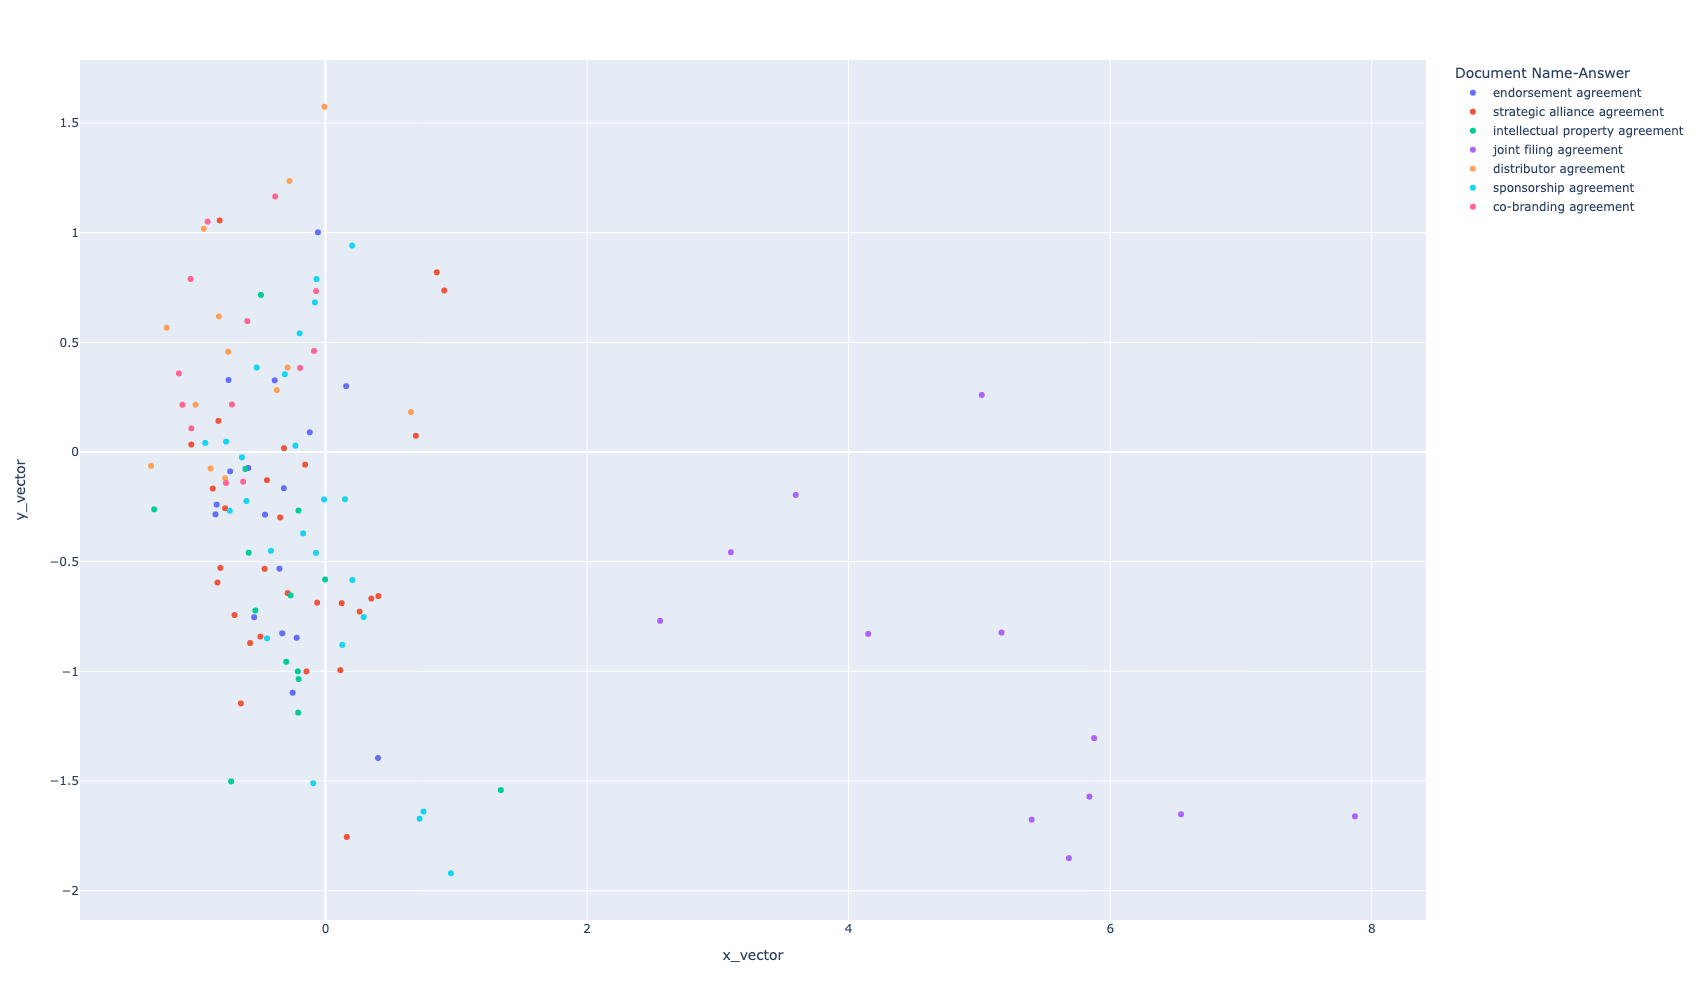

In [70]:
fig = px.scatter(df_subset, x='x_vector', y='y_vector', hover_name='Filename', color='Document Name-Answer', height=1000, width=1000)
fig.show()